### Pontos de pivo para Daytrade
Uma estrategia basica para trading

OBS: Esse modelo Só é funcional para ativos com volatilidade superior a do IBOV, ativos de Beta baixo deverar consultar se compensa com os custo operacionais.

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
import yfinance
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [89]:
ativo = yfinance.Ticker("csna3.SA")
df = ativo.history(interval="5m", period = "1d")

# buscando series historias outro jeito mais simples
#df = pdr.DataReader('itub4.SA',data_source='yahoo', start='2020-02-28', end = '2020-04-02');
#df.tail()

In [90]:
df.iloc[-1].copy()

Open                33.730000
High                33.900002
Low                 33.700001
Close               33.740002
Volume          226300.000000
Dividends            0.000000
Stock Splits         0.000000
Name: 2021-01-22 15:55:00-03:00, dtype: float64

In [91]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-01-21 10:05:00-03:00,33.660000,34.150002,33.660000,34.150002,0,0,0
2021-01-21 10:10:00-03:00,34.110001,34.599998,34.070000,34.150002,701900,0,0
2021-01-21 10:15:00-03:00,34.180000,34.490002,34.150002,34.490002,494200,0,0
2021-01-21 10:20:00-03:00,34.490002,34.930000,34.410000,34.860001,721500,0,0
2021-01-21 10:25:00-03:00,34.830002,34.900002,34.330002,34.490002,835800,0,0
...,...,...,...,...,...,...,...
2021-01-22 15:35:00-03:00,33.680000,33.840000,33.669998,33.799999,121100,0,0
2021-01-22 15:40:00-03:00,33.810001,33.869999,33.740002,33.830002,80100,0,0
2021-01-22 15:45:00-03:00,33.849998,33.860001,33.650002,33.650002,98400,0,0


### Agora vamos para a formula do pivot point
Fonte:
https://www.mql5.com/pt/code/95

Resistência 3 = High + 2*(Pivot - Low)

Resistência 2 = Pivot + (R1 - S1)

Resistência 1 = 2 * Pivot - Low

Pontos Pivô = ( High + Close + Low )/3

Suporte 1 = 2 * Pivot - High

Suporte 2 = Pivot - (R1 - S1)

Suporte 3 = Low - 2*(High - Pivot)


In [92]:
df['Pivot'] = (df['High'] + df['Low'] + df['Close'])/3
df['R1'] = 2*df['Pivot'] - df['Low']
df['S1'] = 2*df['Pivot'] - df['High']
df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
df['R3'] = df['Pivot'] + 2*(df['High'] - df['Low'])
df['S3'] = df['Pivot'] - 2*(df['High'] - df['Low'])


In [93]:
#exportar data frame
#df.to_excel('csna3.xlsx')

### Generalizando para todos os daods


In [94]:
#Codigo para exclução de colunas 
#df =df.drop(columns=[('')])

In [95]:
#visualizando DF
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3
Datetime,,,,,,,,,,,,,,
2021-01-22 15:35:00-03:00,33.680000,33.840000,33.669998,33.799999,121100,0,0,33.769999,33.870000,33.699998,33.940001,33.599997,34.110003,33.429995
2021-01-22 15:40:00-03:00,33.810001,33.869999,33.740002,33.830002,80100,0,0,33.813334,33.886667,33.756669,33.943331,33.683337,34.073329,33.553340
2021-01-22 15:45:00-03:00,33.849998,33.860001,33.650002,33.650002,98400,0,0,33.720001,33.790001,33.580002,33.930000,33.510002,34.139999,33.300003
2021-01-22 15:50:00-03:00,33.650002,33.779999,33.650002,33.720001,61300,0,0,33.716667,33.783333,33.653336,33.846664,33.586670,33.976662,33.456673
2021-01-22 15:55:00-03:00,33.730000,33.900002,33.700001,33.740002,226300,0,0,33.780001,33.860002,33.660001,33.980002,33.580001,34.180003,33.380000


In [96]:
#criando colulas vazias no data frema
df['Compra pivot'],df['Venda S1'],df['Acumulado'] = 'NaN','NaN','NaN'

In [97]:
#copiando dataframe para poder fazer os calculos
#dfcalc = df.copy()

In [98]:
#excluindo primeira linha do df para poder usar como inicio o comparador do outro df calc vou excluir apenas com um filtro
#df = df.loc[df.index > '2020-01-02']

In [99]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,,,,,
2021-01-21 10:05:00-03:00,33.660000,34.150002,33.660000,34.150002,0,0,0,33.986668,34.313335,33.823334,34.476669,33.496666,34.966671,33.006664,NaN,NaN,NaN
2021-01-21 10:10:00-03:00,34.110001,34.599998,34.070000,34.150002,701900,0,0,34.273333,34.476667,33.946668,34.803332,33.743334,35.333331,33.213336,NaN,NaN,NaN
2021-01-21 10:15:00-03:00,34.180000,34.490002,34.150002,34.490002,494200,0,0,34.376668,34.603335,34.263335,34.716668,34.036668,35.056669,33.696668,NaN,NaN,NaN
2021-01-21 10:20:00-03:00,34.490002,34.930000,34.410000,34.860001,721500,0,0,34.733334,35.056667,34.536667,35.253334,34.213333,35.773335,33.693333,NaN,NaN,NaN
2021-01-21 10:25:00-03:00,34.830002,34.900002,34.330002,34.490002,835800,0,0,34.573335,34.816668,34.246668,35.143335,34.003335,35.713334,33.433336,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22 15:35:00-03:00,33.680000,33.840000,33.669998,33.799999,121100,0,0,33.769999,33.870000,33.699998,33.940001,33.599997,34.110003,33.429995,NaN,NaN,NaN
2021-01-22 15:40:00-03:00,33.810001,33.869999,33.740002,33.830002,80100,0,0,33.813334,33.886667,33.756669,33.943331,33.683337,34.073329,33.553340,NaN,NaN,NaN
2021-01-22 15:45:00-03:00,33.849998,33.860001,33.650002,33.650002,98400,0,0,33.720001,33.790001,33.580002,33.930000,33.510002,34.139999,33.300003,NaN,NaN,NaN


In [100]:
#renomedo colunas  codigo comentado para nao execultaR
##dfcalc = dfcalc.rename(columns={'Pivot': 'P-Pivot','S1':'S-S1'})

In [101]:
#Criando nova coluna inutil kkkkkkkk
###df['P-Pivot'] = 'NaN'

## Inicio de teste de loops
Não execultar linhas abaixos

In [102]:
#testes = df['Pivot'][n]/df['Pivot'][n -1]

In [103]:
#testes

In [104]:
# testa dor de entrada de valor está correto!

#posicao = 4
#if df['High'][posicao]>df['Pivot'][posicao - 1]:
#    df['Compra pivot'][posicao] = df['Close'][posicao] - df['Pivot'][posicao - 1]
#else:
#    df['Compra pivot'][posicao] = 0

In [105]:
#n = 0
#while n<7:
#    df['Compra pivot'] = 'NaN';
 #   n = n +1;

## Fim de teste de loops
tudo abaixo pode ser execultado 

In [106]:
#criando valores de lucro na entrada comprando no Pivot
posicao = 0
while posicao<len(df['Pivot']):
    if df['High'][posicao]>df['Pivot'][posicao - 1]:
        df['Compra pivot'][posicao] = df['Close'][posicao] - df['Pivot'][posicao - 1]
    else:
        df['Compra pivot'][posicao] = 0
    posicao = posicao +1;


In [107]:
#criando valores de lucro na entrada vendido na Primeiro Suporte
posicao = 0
while posicao<len(df['S1']):
    if df['Low'][posicao]<df['S1'][posicao - 1]:
        df['Venda S1'][posicao] = df['S1'][posicao - 1] - df['Close'][posicao]
    else:
        df['Venda S1'][posicao] = 0
    posicao = posicao +1;


In [108]:
# SOMANDO SO RESULTADOS DOS GANHOS DAS ENTRADAS DE UM LOTE MINIMO DE 100 AÇOES- COMPRA E VENDA; 
for index, row in df.iterrows():
    df.loc[index,'Acumulado'] = (df.loc[index,'Compra pivot'] + df.loc[index,'Venda S1'])*100;

In [109]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,,,,,
2021-01-22 15:35:00-03:00,33.680000,33.840000,33.669998,33.799999,121100,0,0,33.769999,33.870000,33.699998,33.940001,33.599997,34.110003,33.429995,0.146666,0,14.6666
2021-01-22 15:40:00-03:00,33.810001,33.869999,33.740002,33.830002,80100,0,0,33.813334,33.886667,33.756669,33.943331,33.683337,34.073329,33.553340,0.0600026,0,6.00026
2021-01-22 15:45:00-03:00,33.849998,33.860001,33.650002,33.650002,98400,0,0,33.720001,33.790001,33.580002,33.930000,33.510002,34.139999,33.300003,-0.163333,0.106668,-5.66648
2021-01-22 15:50:00-03:00,33.650002,33.779999,33.650002,33.720001,61300,0,0,33.716667,33.783333,33.653336,33.846664,33.586670,33.976662,33.456673,0,0,0
2021-01-22 15:55:00-03:00,33.730000,33.900002,33.700001,33.740002,226300,0,0,33.780001,33.860002,33.660001,33.980002,33.580001,34.180003,33.380000,0.0233345,0,2.33345


In [110]:
#excluindo primeira linha do df usar como inicio do comparador - SE NAO VC TEM UM ENTRADA COM O PARAMENTRO DO ULTIMO DIA
# E ISSO IRIA MUDAR O VALOR NA SOMATORIA TOTAL
df = df.loc[df.index > '2020-10-20 10:10:00']

In [111]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3,Compra pivot,Venda S1,Acumulado
Datetime,,,,,,,,,,,,,,,,,
2021-01-21 10:05:00-03:00,33.660000,34.150002,33.660000,34.150002,0,0,0,33.986668,34.313335,33.823334,34.476669,33.496666,34.966671,33.006664,0.37,-0.49,-12
2021-01-21 10:10:00-03:00,34.110001,34.599998,34.070000,34.150002,701900,0,0,34.273333,34.476667,33.946668,34.803332,33.743334,35.333331,33.213336,0.163334,0,16.3334
2021-01-21 10:15:00-03:00,34.180000,34.490002,34.150002,34.490002,494200,0,0,34.376668,34.603335,34.263335,34.716668,34.036668,35.056669,33.696668,0.216668,0,21.6668
2021-01-21 10:20:00-03:00,34.490002,34.930000,34.410000,34.860001,721500,0,0,34.733334,35.056667,34.536667,35.253334,34.213333,35.773335,33.693333,0.483332,0,48.3332
2021-01-21 10:25:00-03:00,34.830002,34.900002,34.330002,34.490002,835800,0,0,34.573335,34.816668,34.246668,35.143335,34.003335,35.713334,33.433336,-0.243332,0.0466652,-19.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22 15:35:00-03:00,33.680000,33.840000,33.669998,33.799999,121100,0,0,33.769999,33.870000,33.699998,33.940001,33.599997,34.110003,33.429995,0.146666,0,14.6666
2021-01-22 15:40:00-03:00,33.810001,33.869999,33.740002,33.830002,80100,0,0,33.813334,33.886667,33.756669,33.943331,33.683337,34.073329,33.553340,0.0600026,0,6.00026
2021-01-22 15:45:00-03:00,33.849998,33.860001,33.650002,33.650002,98400,0,0,33.720001,33.790001,33.580002,33.930000,33.510002,34.139999,33.300003,-0.163333,0.106668,-5.66648


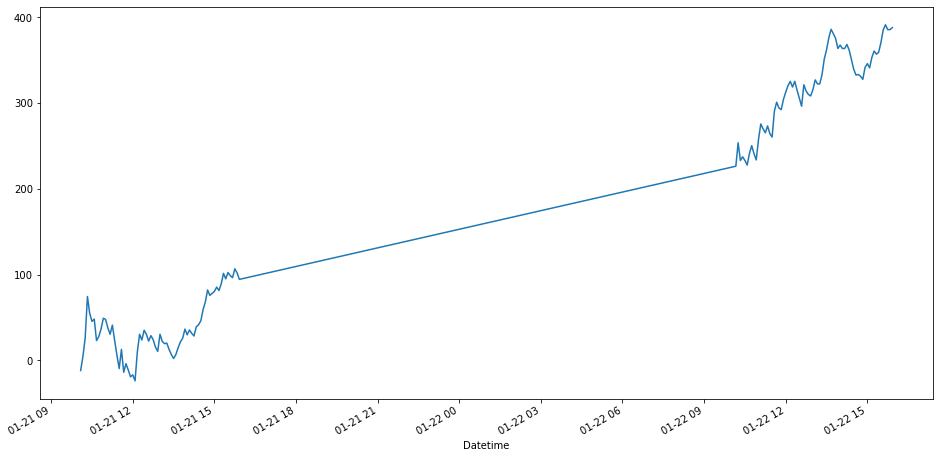

In [112]:
np.cumsum(df['Acumulado']).plot(figsize = (16,8))